In [2]:
# %pip install nltk==3.8.1
# %pip install scikit-learn==1.2.2
# %pip install vaderSentiment==3.3.2
# %pip install wordcloud==1.9.3
# %pip install unidecode==1.3.8
# %pip install textblob==0.17.1
# %pip install pandas==2.0.3
# %pip install transformers==4.38.2

In [ ]:
import re
import string
import warnings

import nltk
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
from unidecode import unidecode
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

nltk.download('punkt')
nltk.download("stopwords")

warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jean_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jean_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def preprocessa_texto(texto):
    """
    Preprocessa o texto fornecido realizando várias etapas de limpeza.

    Etapas:
    1. Tokeniza o texto.
    2. Converte os tokens para minúsculos.
    3. Remove stopwords em português.
    4. Remove números dos tokens.
    5. Exclui tokens que são pontuações.
    6. Remove acentuações dos tokens.

    Parâmetros:
    texto (str): O texto a ser preprocessado.

    Retorna:
    list: Lista de tokens preprocessados.
    """

    # Tokeniza o texto usando um padrão para capturar palavras e pontuações.
    padrao = r"\w+(?:'\w+)?|[^\w\s]"
    tokens_preprocessados = re.findall(padrao, texto)

    # Converte os tokens para minúsculos para padronizar a capitalização.
    tokens_preprocessados = [token.lower() for token in tokens_preprocessados]

    # Remove stopwords para reduzir o conjunto de tokens a palavras significativas.
    portugues_stops = stopwords.words('portuguese')
    tokens_preprocessados = [token for token in tokens_preprocessados if token not in portugues_stops]

    # Remove números, pois geralmente não contribuem para o significado do texto.
    tokens_preprocessados = [re.sub(r'\d+', '', token) for token in tokens_preprocessados if re.sub(r'\d+', '', token)]

    # Exclui tokens que são pontuações, pois raramente são úteis para análise de texto.
    tokens_preprocessados = [token for token in tokens_preprocessados if token not in string.punctuation]

    # Remove acentuações para padronizar os tokens.
    tokens_preprocessados = [unidecode(token) for token in tokens_preprocessados]

    return ' '.join(tokens_preprocessados)

In [5]:
URL = "https://raw.githubusercontent.com/gomesluiz/pln-na-pratica/main/datasets/financial_sentiment.csv"

sentimentos = pd.read_csv(URL)
sentimentos.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


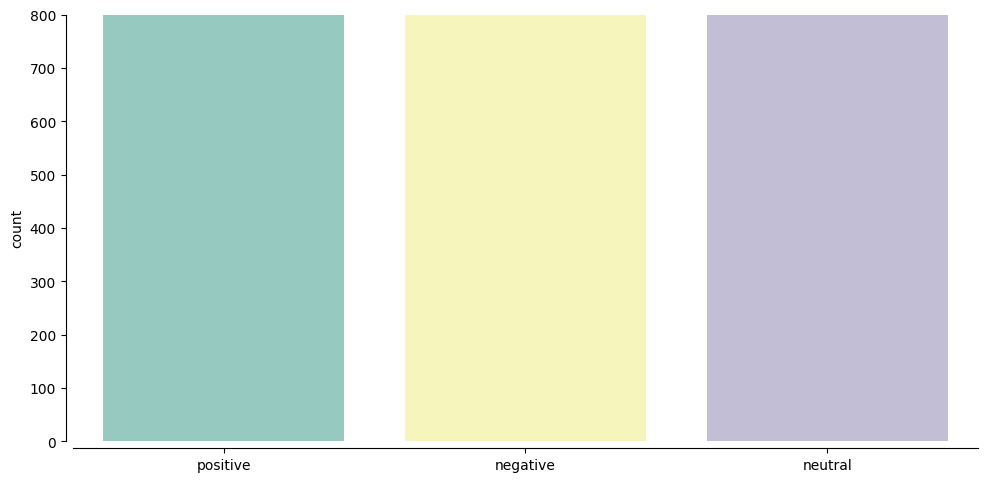

In [6]:
g = sns.catplot(
    data=sentimentos,
    x="Sentiment",
    height=5,
    aspect=2,
    kind="count",
    palette="Set3",
    hue="Sentiment",
    legend=False,
)

sns.despine(offset=5)

g.set(ylim=(0, 800))
g.set(xlabel=None)

In [7]:
sentimentos["Preprocessed_Sentence"] = sentimentos["Sentence"].apply(preprocessa_texto)
sentimentos.head()

,Sentence,Sentiment,Preprocessed_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,the last quarter of componenta s net sales dou...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sentimentos["Preprocessed_Sentence"],
    sentimentos["Sentiment"],
    test_size=0.25,
    random_state=32,
)

In [9]:
vetorizador = CountVectorizer(max_features=1000)
X_train_vetorizado = vetorizador.fit_transform(X_train)
X_train_vetorizado = pd.DataFrame(
    X_train_vetorizado.toarray(), columns=vetorizador.get_feature_names_out()
)
X_train_vetorizado.index = X_train_vetorizado.index
X_train_vetorizado.head()

,aapl,ab,able,about,above,access,according,acquire,acquired,acquisition,...,www,xac,year,years,yesterday,yet,yhoo,yit,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_test_vetorizado = vetorizador.transform(X_test)
X_test_vetorizado = pd.DataFrame(
    X_test_vetorizado.toarray(), columns=vetorizador.get_feature_names_out()
)
X_test_vetorizado.index = X_test_vetorizado.index
X_test_vetorizado.head()

,aapl,ab,able,about,above,access,according,acquire,acquired,acquisition,...,www,xac,year,years,yesterday,yet,yhoo,yit,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
_ = clf.fit(X_train_vetorizado, y_train)

In [12]:
from sklearn import metrics

y_pred = clf.predict(X_test_vetorizado)

print(metrics.accuracy_score(y_pred, y_test))

0.6865160848733745


In [13]:
texto_1 = sentimentos.iloc[0]["Sentence"]
texto_2 = sentimentos.iloc[1]["Sentence"]
texto_3 = sentimentos.iloc[3]["Sentence"]

p_1 = TextBlob(sentimentos.iloc[0]["Sentence"]).sentiment.polarity
p_2 = TextBlob(sentimentos.iloc[1]["Sentence"]).sentiment.polarity
p_3 = TextBlob(sentimentos.iloc[3]["Sentence"]).sentiment.polarity

print(p_1)
print(p_2)
print(p_3)

0.2090909090909091
0.022222222222222227
0.0625


In [14]:
sentiment = SentimentIntensityAnalyzer()
se_1 = sentiment.polarity_scores(texto_1)
se_2 = sentiment.polarity_scores(texto_2)
se_3 = sentiment.polarity_scores(texto_3)

print(se_1)
print(se_2)
print(se_3)

{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.5423}
{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.2023}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [16]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
textos = [texto_1, texto_2, texto_3]
sentiment_pipeline(textos)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9991747736930847},
 {'label': 'NEGATIVE', 'score': 0.9931260347366333},
 {'label': 'POSITIVE', 'score': 0.9968819618225098}]